Cluster Assignments:
Point [1.  1.5]: Cluster 2
Point [1.5 1.8]: Cluster 2
Point [1.2 1.3]: Cluster 2
Point [1.4 1.7]: Cluster 2
Point [5.  5.5]: Cluster 1
Point [5.5 5.8]: Cluster 1
Point [5.2 5.3]: Cluster 1
Point [5.4 5.7]: Cluster 1
Point [2.  2.1]: Cluster 2
Point [1.8 1.9]: Cluster 2
Point [5.1 5.4]: Cluster 1
Point [5.3 5.6]: Cluster 1

Final Centroids:
Cluster 1: [5.25 5.55]
Cluster 2: [1.48333333 1.71666667]

WCSS: 1.4467


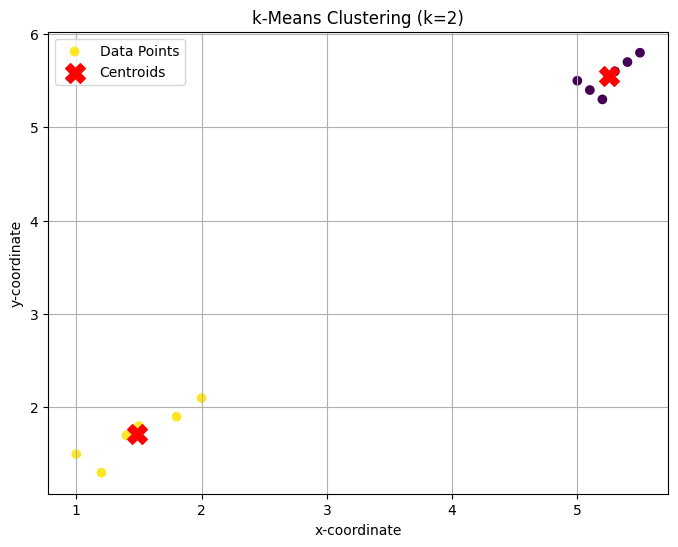

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
data = np.array([
    [1.0, 1.5],
    [1.5, 1.8],
    [1.2, 1.3],
    [1.4, 1.7],
    [5.0, 5.5],
    [5.5, 5.8],
    [5.2, 5.3],
    [5.4, 5.7],
    [2.0, 2.1],
    [1.8, 1.9],
    [5.1, 5.4],
    [5.3, 5.6]
])

# k-Means Clustering
def k_means(data, k=2, max_iter=100):
    # Randomly initialize centroids
    centroids = data[np.random.choice(len(data), k, replace=False)]

    for _ in range(max_iter):
        # Assign each point to the nearest centroid
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        clusters = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    # Compute WCSS
    wcss = sum(np.sum((data[clusters == i] - centroids[i])**2) for i in range(k))

    return clusters, centroids, wcss

# Run k-Means
clusters, centroids, wcss = k_means(data)

# Output results
print("Cluster Assignments:")
for i, point in enumerate(data):
    print(f"Point {point}: Cluster {clusters[i] + 1}")

print("\nFinal Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i + 1}: {centroid}")

print(f"\nWCSS: {wcss:.4f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('k-Means Clustering (k=2)')
plt.legend()
plt.grid(True)
plt.show()